# Application 3 - Visualize Moon From Scratch

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [26]:
x, y = sklearn.datasets.make_moons(10000, noise = 0.15)

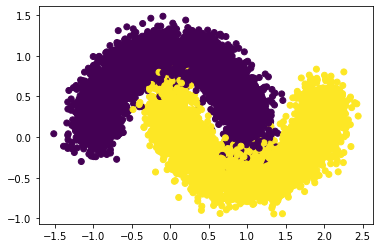

In [27]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [28]:
input_neurons = 2
output_neurons = 2
samples = x.shape[0]
learning_rate = 0.001
lambda_reg = 0.01

In [29]:
def retreive(model_dict):
    W1 = model_dict['W1']
    b1 = model_dict['b1']
    W2 = model_dict['W2']
    b2 = model_dict['b2']
    return W1, b1, W2, b2

In [30]:
def forward(x, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True) 
    return z1, a1, softmax

In [31]:
def loss(softmax, y, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)
    m = np.zeros(y.shape[0])
    for i,correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(m)
    loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss+= reg_loss
    return float(loss / y.shape[0])

In [32]:
def predict(model_dict, x):
    W1, b1, W2, b2 = retreive(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    return np.argmax(softmax, axis = 1)

In [33]:
def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retreive(model_dict)
        z1, a1, probs = forward(x, model_dict)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(np.tanh(z1), 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms
        dW2 += lambda_reg * np.sum(W2)  
        dW1 += lambda_reg * np.sum(W1) 

        # Update Weights
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2

        # Update the model dictionary
        model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Print the loss every 50 epochs
        if i%500 == 0:
            print("Loss at epoch {} is: {:.3f}".format(i,loss(probs, y, model_dict)))
            
    return model_dict

In [34]:
# Define Initial Weights
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
    
    # Xavier Initialization
    W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))
    model['W1'] = W1
    model['b1'] = b1
    model['W2'] = W2
    model['b2'] = b2
    return model

In [35]:
def plot_decision_boundary(pred_func): 
    
    # Set min and max values and give it some padding 
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5 
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5 
    h = 0.01

    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 

    # Predict the function value for the whole gid 
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral) 
    plt.title("Decision Boundary for hidden layer size 3")

Loss at epoch 0 is: 0.658
Loss at epoch 500 is: 0.405
Loss at epoch 1000 is: 0.408
Loss at epoch 1500 is: 0.378
Loss at epoch 2000 is: 0.406
Loss at epoch 2500 is: 0.415
Loss at epoch 3000 is: 0.440
Loss at epoch 3500 is: 0.412
Loss at epoch 4000 is: 0.409
Loss at epoch 4500 is: 0.147
Loss at epoch 5000 is: 0.045
Loss at epoch 5500 is: 0.044
Loss at epoch 6000 is: 0.043
Loss at epoch 6500 is: 0.042
Loss at epoch 7000 is: 0.041
Loss at epoch 7500 is: 0.040
Loss at epoch 8000 is: 0.039
Loss at epoch 8500 is: 0.038
Loss at epoch 9000 is: 0.036
Loss at epoch 9500 is: 0.034


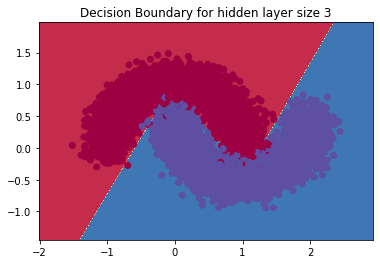

In [36]:
model_dict = init_network(input_dim = input_neurons , hidden_dim = 3, output_dim = output_neurons)
model = backpropagation(x, y, model_dict, 10000)
plot_decision_boundary(lambda x: predict(model, x))